# Atividades

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

True

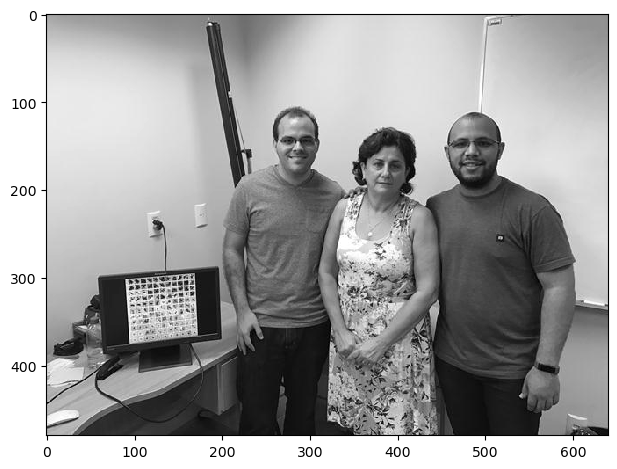

In [8]:
img = cv2.imread("images/romuere.jpg",0)
imshow(img)
cv2.imwrite("images/romuere_gray.jpg",img)

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

True

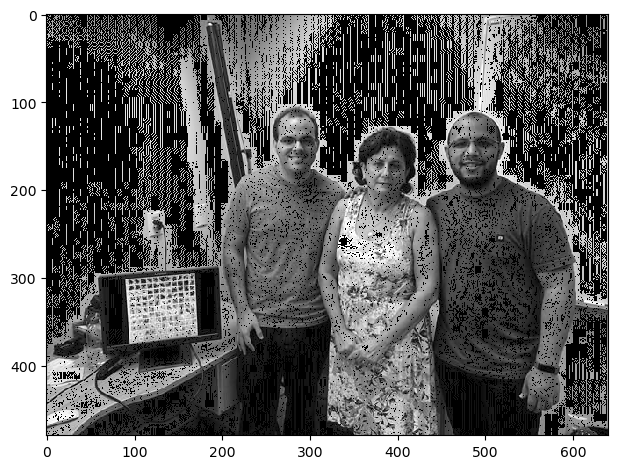

In [11]:
img = cv2.imread("images/romuere.jpg",0)
for i in range(img.shape[0]):
    for j in range(img.shape[1] -1):
        if img[i][j] == img[i][j + 1]:
            img[i][j] = 0
imshow(img)
cv2.imwrite("images/romuere_gray_0.jpg",img)
        

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [18]:
def maxMin(split):
    Max = Min = 0
    for i in range(split.shape[0]):
        for j in range(split.shape[1]):
            if split[i][j] > Max:
                Max = split[i][j]
                
            if split[i][j] < Min:
                Min = split[i][j]
                
    return Max, Min
            
img = cv2.imread("images/romuere.jpg")
for i in cv2.split(img):
   print("MAior e Menor pixel {}".format(maxMin(i)))

MAior e Menor pixel (255, 0)
MAior e Menor pixel (255, 0)
MAior e Menor pixel (255, 0)


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

True

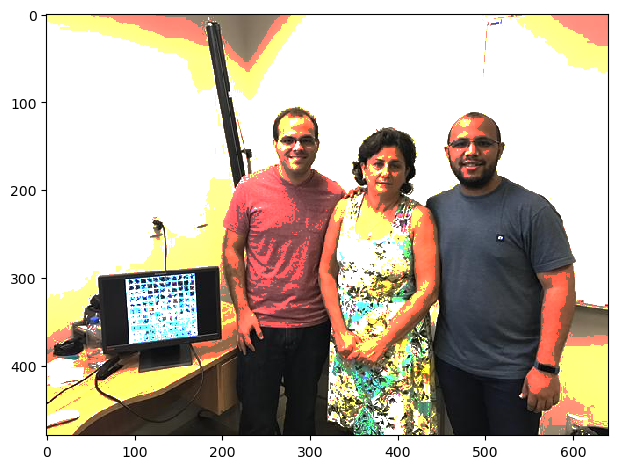

In [43]:

def rgb255(split):
    for i in range(split.shape[0]):
        for j in range(split.shape[1]):
            if split[i][j] > 150:
                split[i][j] = 255
                  
    return split
            
img = imread("images/romuere.jpg")
channel = []
for i in cv2.split(img):
   channel.append(rgb255(i))
   
   
img = cv2.merge([channel[0],channel[1], channel[2]])
imshow(img)
cv2.imwrite("images/romuere_rgb255.jpg",img)

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

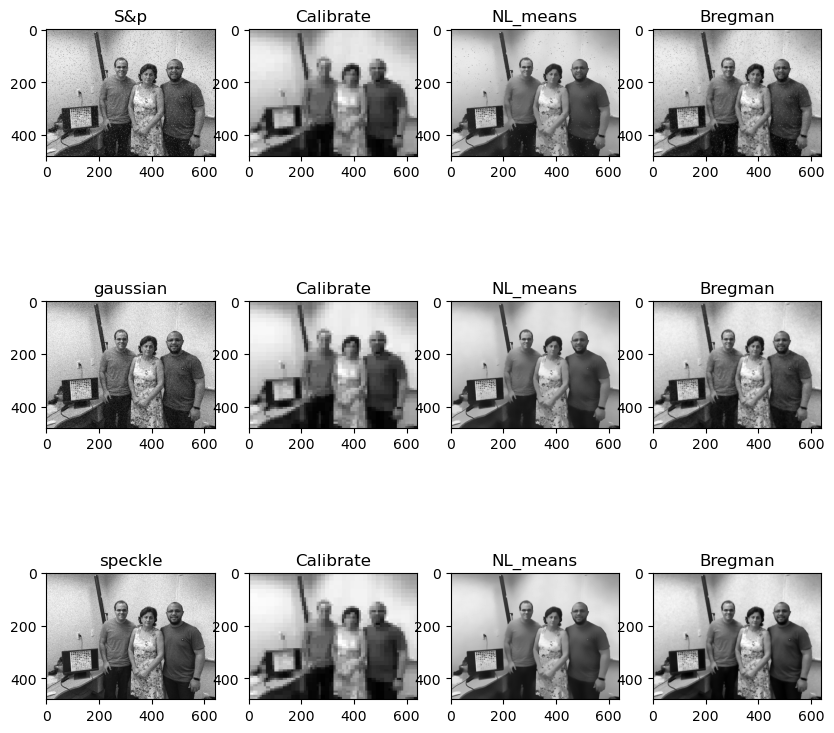

In [105]:
#imagem em gray para deixar o processamento  mais rapido

fig, axis = plt.subplots(3,4,figsize=(10,10))

img = cv2.imread("images/romuere.jpg",0)

ruidos = [random_noise(img, mode='s&p'),random_noise(img, mode='gaussian'),random_noise(img, mode='speckle')]
rng = np.random.default_rng() 

#calibrate_denoiser
noisy = img + 0.5 * img.std() * rng.standard_normal(img.shape)
denoise = restoration.calibrate_denoiser(noisy, restoration.denoise_wavelet, {'sigma': np.arange(0.1, 0.4, 0.02)})
ruido = ["S&p","gaussian", "speckle"]

for i in range(3):
 
    axis[i,0].imshow(ruidos[i],cmap="gray")
    axis[i,0].set_title(ruido[i])

    axis[i,1].imshow(denoise(ruidos[i]),cmap="gray")
    axis[i,1].set_title("Calibrate")

    axis[i,2].imshow(restoration.denoise_nl_means(ruidos[i]),cmap="gray")
    axis[i,2].set_title("NL_means")


    axis[i,3].imshow(restoration.denoise_tv_bregman(ruidos[i]),cmap="gray")
    axis[i,3].set_title("Bregman")


6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

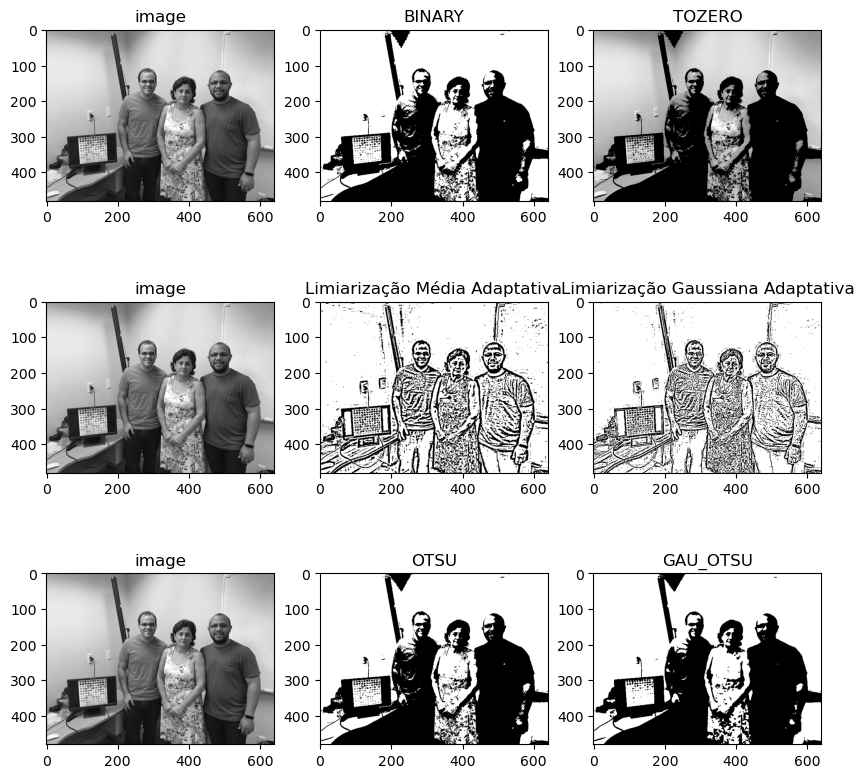

In [90]:
img = cv2.imread("images/romuere.jpg",0)
#limiar global para uma msm imagem
th ,img1 = cv2.threshold (img,127,255,cv2.THRESH_BINARY)
th, img2 = cv2.threshold (img,127,255,cv2.THRESH_TOZERO)
#limiar adptativo onde, haverá limiar diferentes para cada região da imagem
imgadp1 = cv2.adaptiveThreshold (img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
imgadp2 = cv2.adaptiveThreshold (img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
#limiar de otsu estabelece um limiar com base no histograma
th,imgotsu = cv2.threshold (img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur = cv2.GaussianBlur (img,(5,5),0)
th,imgotsu1 = cv2.threshold (blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary = [img1,img2,imgadp1,imgadp2,imgotsu,imgotsu1]
title = ['BINARY', 'TOZERO', 'Média Adaptativa' , 'Gaussiana Adaptativa', 'OTSU', 'GAU_OTSU']

fig, axis = plt.subplots(3,3,figsize=(10,10))
cont = 0
t = "image"
for i in range(3):
    axis[i,0].imshow(img,cmap="gray")
    axis[i,0].set_title(t)
    for j in range(1,3):
        axis[i,j].imshow(binary[cont],cmap="gray")
        axis[i,j].set_title(title[cont])

        cont += 1
        
        
plt.show()


7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

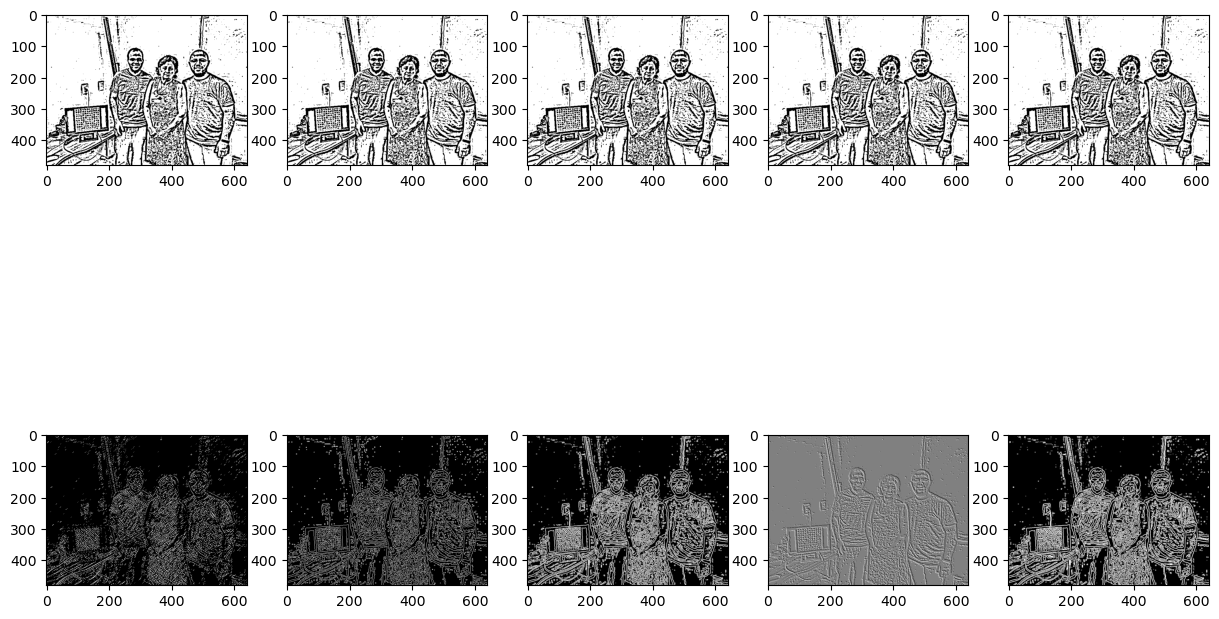

In [84]:
#faz a diferença entre os pixels da direita e da esquerda
sobel = cv2.Sobel(imgadp1, -1, 1, 1)
canny = cv2.Canny(imgadp1,100,200)
schar =  skimage.filters.scharr(imgadp1)
rob = skimage.filters.roberts_neg_diag(imgadp1)
prew = skimage.filters.prewitt(imgadp1)

edge = [sobel, canny, schar,rob, prew]

fig, axis = plt.subplots(2,5,figsize=(15,10))
cont = 0
for i in range(5):
    axis[0,i].imshow(imgadp1,cmap="gray")
    axis[1,i].imshow(edge[cont],cmap="gray")
    cont += 1
    #plt.set_title(title[cont])

        
        
plt.show()

8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

In [195]:
img = cv2.imread("images/romuere.jpg")
r,g,b = cv2.split(img)

crop = r if r.mean() > g.mean() else g
crop = b if  b.mean() > crop.mean() else crop


a, l = crop.shape
print(a,l)
a4, l4= int(a/4), int(l/4)
print(a4,l4)





480 640
120 160


In [196]:
x, y = 0,0
std = 0
for i in range(0,crop.shape[0],3):
    for j in range(0,crop.shape[1],3):
        if i + 3 < crop.shape[0] and j + 3 <  crop.shape[1]:
            if crop[i: i +3, j : j + 3].std() > std:
                std = crop[i: i +3, j : j + 3].std()
                x,y = i + 1,j + 1
            elif i + 3 < crop.shape[0]:
                
                if crop[i: i , j : j + 3].std() > std:
                    std = crop[i: i , j : j + 3].std()
                    x,y = i + 1,j + 1
                
            elif j + 3 <  crop.shape[1]:
                
                 if crop[i: i + 3 , j : j ].std() > std:
                    std = crop[i: i , j : j + 3].std()
                    x,y = i + 1,j + 1
                
        
print(std,x,y)

94.2845705665226 316 91


In [197]:
xmin = x - int(a4/2)
xmax = xmin + a4
ymin = y - int(l4/2)
ymax = ymin + l4
print(xmin, xmax, ymin, ymax)

256 376 11 171


In [198]:
if xmin < 0: 
    xmax += (-1 * xmin)
    xmin = 0
    
if ymin < 0: 
    ymax += (-1 * ymin)
    ymin = 0
    
    
if xmax > img.shape[0]: 
    xmin -= (img.shape[0] - xmax)
    xmax = img.shape[0] - 1
    
if ymax > img.shape[1]: 
    ymin -= (img.shape[1] - ymax)
    ymax = img.shape[1] - 1

   

(120, 160)

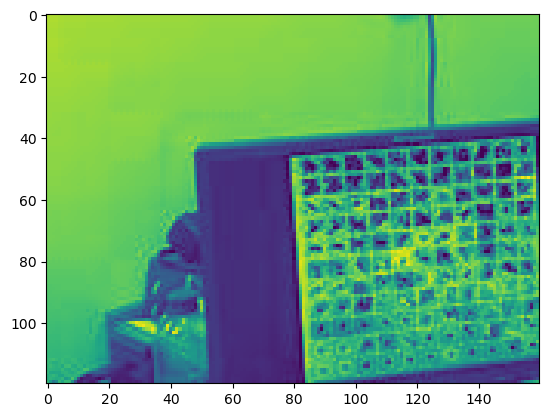

In [199]:
crop1 = crop[xmin: xmax,  ymin:  ymax]

plt.imshow(crop1)
crop1.shape


(120, 160)

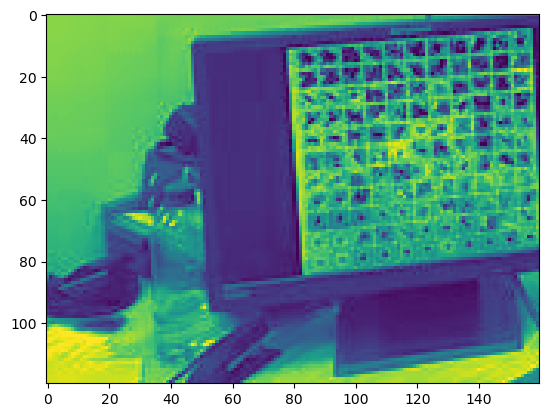

In [176]:
crop1 = crop[xmin: xmax,  ymin:  ymax]

plt.imshow(crop1)
crop1.shape
